<h3 align='center'>
    Análisis exploratorio de los datos - EDA
<h3/>

El objetivo principal del EDA es obtener una comprensión sólida de tus datos, lo que te ayudará a tomar decisiones informadas sobre el enfoque de tu análisis subsiguiente y a identificar posibles problemas en los datos que necesiten ser abordados antes de avanzar en el análisis.

In [16]:
# importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leer datos desde csv en dataframe de pandas
encoding = "utf8"

clientes = pd.read_csv("..\datos\csvs_limpios\Clientes.csv", sep=",", encoding=encoding)
compra = pd.read_csv("..\datos\csvs_limpios\Compra.csv", sep=",", encoding=encoding)
empleados = pd.read_csv("..\datos\csvs_limpios\Empleados.csv", sep=",", encoding=encoding)
gasto = pd.read_csv("..\datos\csvs_limpios\Gasto.csv", sep=",", encoding=encoding)
productos = pd.read_csv("..\datos\csvs_limpios\Productos.csv", sep=",", encoding=encoding)
proveedores = pd.read_csv("..\datos\csvs_limpios\Proveedores.csv", sep=",", encoding=encoding)
sucursales = pd.read_csv("..\datos\csvs_limpios\Sucursales.csv", sep=";",encoding=encoding)
venta = pd.read_csv("..\datos\csvs_limpios\Venta.csv", sep=",", encoding=encoding)

#### Resumen estadistico

* clientes

In [3]:
# Exploracion de df
clientes.head()

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,425161
1,2,Buenos Aires,ANA SAPRIZA,PUEYRREDON Y DUPUY RUTA3 KM 52.500 S/N BÂº LO...,497578
2,3,Buenos Aires,FERNANDO LUIS SARALEGUI,CALDERON DE LA BARCA 498,493435
3,4,Buenos Aires,MANUELA SARASOLA,"RUTA 36 KM 45,500 S/N EL PELIGRO",492883
4,5,Buenos Aires,MARIO RAÚL SARASUA,492 Y 186 S/N COLONIA URQUIZA,4914608


In [4]:
#  Estadísticas descriptiva: media, mediana, desviación estándar, el rango y los cuartiles para comprender la distribución de los datos
clientes.describe()

,ID
count,3407.000000
mean,1704.000000
std,983.660511
min,1.000000
25%,852.500000
50%,1704.000000
75%,2555.500000
max,3407.000000


In [5]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3407 entries, 0 to 3406
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 3407 non-null   int64 
 1   Provincia          3407 non-null   object
 2   Nombre_y_Apellido  3407 non-null   object
 3   Domicilio          3407 non-null   object
 4   Telefono           3317 non-null   object
dtypes: int64(1), object(4)
memory usage: 133.2+ KB


La tabla clientes no contiene datos de tipo numerico excepto el id de clientes 

* Compra

In [8]:
compra.head()

,IdCompra,Fecha,IdProducto,Cantidad,Precio,IdProveedor
0,1,2015-01-30,42832,13,560.51,12
1,2,2015-01-30,42833,11,497.58,7
2,3,2015-01-30,42834,1,588.50,6
3,4,2015-01-30,42835,9,567.66,14
4,5,2015-01-30,42839,14,231.31,2


In [13]:
# Convertir la columna fecha a datetima
compra['Fecha'] = pd.to_datetime(compra['Fecha'])

In [14]:
compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   IdCompra     11539 non-null  int64         
 1   Fecha        11539 non-null  datetime64[ns]
 2   IdProducto   11539 non-null  int64         
 3   Cantidad     11539 non-null  int64         
 4   Precio       11539 non-null  float64       
 5   IdProveedor  11539 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 541.0 KB


In [15]:
compra.describe()

,IdCompra,Fecha,IdProducto,Cantidad,Precio,IdProveedor
count,11539.000000,11539,11539.000000,11539.000000,11539.000000,11539.000000
mean,5770.000000,2018-03-16 00:12:13.789756672,42900.634890,8.826415,1171.177534,7.533928
min,1.000000,2015-01-30 00:00:00,42737.000000,1.000000,1.860000,1.000000
25%,2885.500000,2016-08-26 00:00:00,42832.000000,4.000000,303.295000,4.000000
50%,5770.000000,2018-03-30 00:00:00,42902.000000,7.000000,448.950000,8.000000
75%,8654.500000,2019-11-29 00:00:00,42973.000000,12.000000,1197.550000,11.000000
max,11539.000000,2020-12-25 00:00:00,43043.000000,54.000000,107024.000000,14.000000
std,3331.166713,NaN,83.539532,6.412074,5439.951255,3.770609


* Comparacion de distribucion Media y desviacion estandar

In [37]:
# Precio Media y Mediana redondeado a 3 decimales
mediaPrecio = compra['Precio'].mean().round(3)
stdPrecio = compra['Precio'].std().round(3)
print(f'La Media de Precio en Compras es: {mediaPrecio}')
print(f'La Desviacion Estandar de Precio en Compras es: {stdPrecio}')

La Media de Precio en Compras es: 1171.178
La Desviacion Estandar de Precio en Compras es: 5439.951


In [38]:
# Cantidad Media y Mediana 
mediaCantidad = compra['Cantidad'].mean().round(3)
stdCantidad = compra['Cantidad'].std().round(3)

print(f'La Media de Cantidad en Compras es: {mediaCantidad}')
print(f'La Desviacion Estandar de Cantidad en Compra es: {stdCantidad}')


La Media de Cantidad en Compras es: 8.826
La Desviacion Estandar de Cantidad en Compra es: 6.412


* comparacion de distribucion Median e IQR

In [49]:
median = compra['Precio'].median()
iqr = compra['Precio'].quantile(0.75) - compra['Precio'].quantile(0.25)

print(f'La Mediana de Precio en Compra es: {median}')
print(f'El IQR de Precio en Compra es: {iqr}')

La Mediana de Precio en Compra es: 448.95
El IQR de Precio en Compra es: 894.255


In [48]:
medianCantidad = compra['Cantidad'].median()
iqrCantidad = compra['Cantidad'].quantile(0.75) - compra['Cantidad'].quantile(0.25)

print(f'La Mediana de Cantidad en Compra es: {medianCantidad}')
print(f'IQR de Cantidad en Compra es: {iqrCantidad}')

La Mediana de Cantidad en Compra es: 7.0
IQR de Cantidad en Compra es: 8.0


## Precio en Compras:
La diferencia significativa entre la media y la desviación estándar sugiere una distribución sesgada hacia valores más altos. Esto podría indicar que hay algunos valores extremadamente altos que están afectando la media.

La mediana (448.95) está bastante alejada de la media, lo que respalda la indicación de una posible distribución sesgada.
El IQR (894.255) es alto, lo que confirma una gran dispersión de los datos.

## Cantidad en Compras:
La diferencia entre la media y la desviación estándar es menor, indicando una distribución menos sesgada. La proximidad entre estos dos valores sugiere que no hay valores extremos que afecten significativamente la media.
La mediana y el IQR (7.0 y 8.0, respectivamente) indican una dispersión moderada de los datos alrededor de la mediana.

### Observaciones Generales:
La desviación estándar alta en "Precio" confirma una variabilidad significativa en los datos.
Los percentiles 25 y 75 y el IQR señalan una dispersión hacia la mediana en ambas columnas, siendo más pronunciada en "Cantidad".

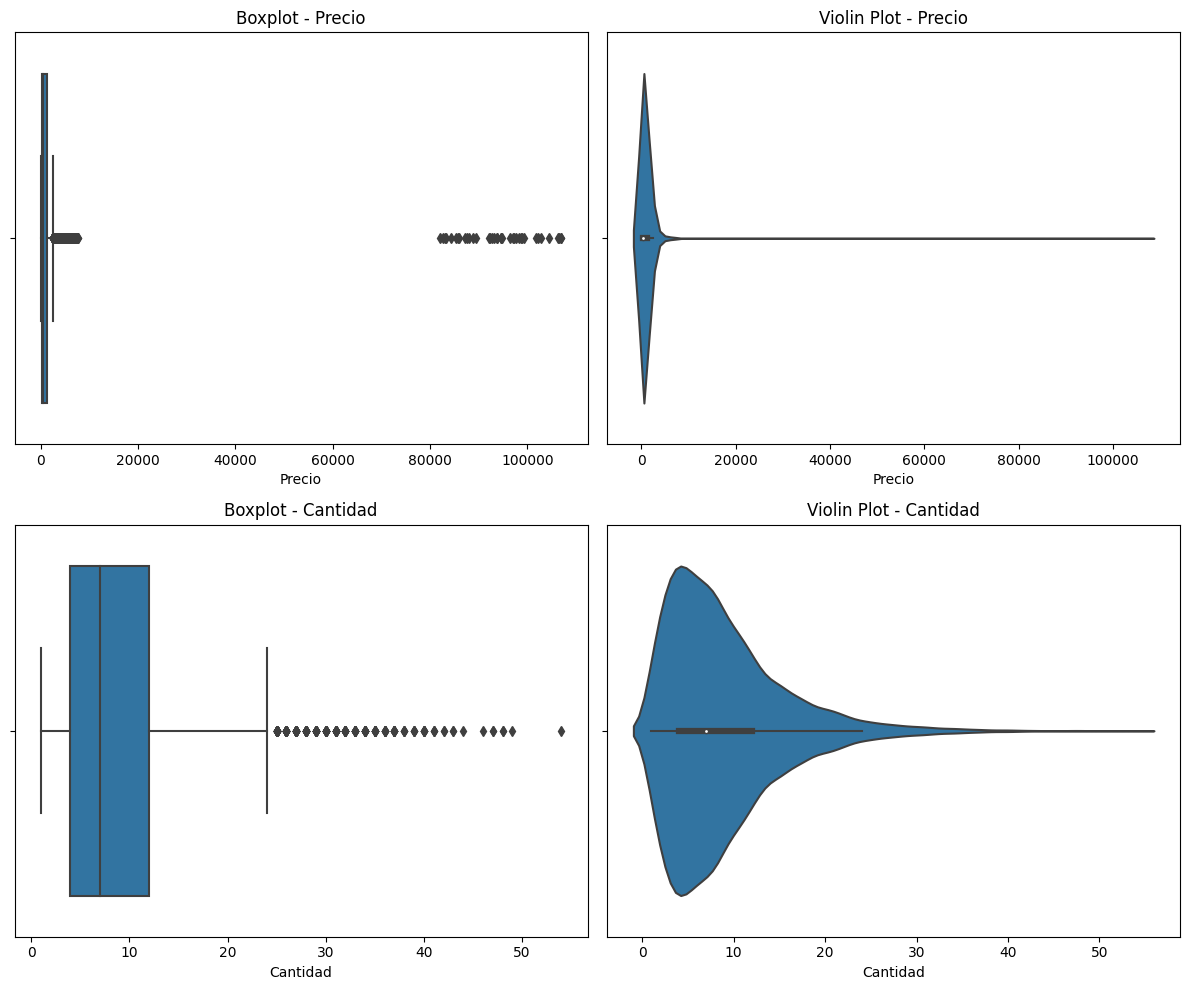

In [60]:
# Crear subgráficos para 'Precio' y 'Cantidad'
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Gráfico de caja para 'Precio'
sns.boxplot(x=compra['Precio'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot - Precio')

# Diagrama de violín para 'Precio'
sns.violinplot(x=compra['Precio'], ax=axes[0, 1])
axes[0, 1].set_title('Violin Plot - Precio')

# Gráfico de caja para 'Cantidad'
sns.boxplot(x=compra['Cantidad'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot - Cantidad')

# Diagrama de violín para 'Cantidad'
sns.violinplot(x=compra['Cantidad'], ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot - Cantidad')

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()